In [9]:
# Read in data
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline

train_features = pd.read_csv('../../data/split_data/train_features.csv', index_col='AppointmentID')
train_labels = pd.read_csv('../../data/split_data/train_labels.csv', index_col='AppointmentID')

train_features.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppDay_weekend,DayDiff,MissedApp
AppointmentID,,,,,,,,,,,
1791,1,25,0,0,0,0,0,0,0,0,0
81170,0,11,0,0,0,0,0,0,0,0,0
83988,1,23,0,0,0,0,0,0,0,0,1
40659,1,5,0,0,0,0,0,0,0,0,0
27567,1,46,0,0,0,0,0,1,0,12,2


In [10]:
train_labels.head()

,No-show
AppointmentID,
1791,0
81170,0
83988,0
40659,0
27567,1


<AxesSubplot:>

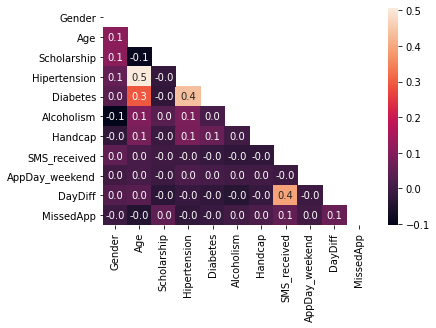

In [11]:
# Check if there are correlation between the features. Ideally, if there features which are highly correlated, we can 
# only using one of them instead of both. 
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', mask=matrix)

### 1. Random forest model

In [12]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [13]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 64}

0.833 (+/-0.059) for {'max_depth': 2, 'n_estimators': 8}
0.854 (+/-0.101) for {'max_depth': 2, 'n_estimators': 16}
0.817 (+/-0.049) for {'max_depth': 2, 'n_estimators': 32}
0.813 (+/-0.034) for {'max_depth': 2, 'n_estimators': 64}
0.811 (+/-0.033) for {'max_depth': 2, 'n_estimators': 128}
0.8 (+/-0.004) for {'max_depth': 2, 'n_estimators': 256}
0.799 (+/-0.004) for {'max_depth': 2, 'n_estimators': 512}
0.912 (+/-0.019) for {'max_depth': 4, 'n_estimators': 8}
0.919 (+/-0.013) for {'max_depth': 4, 'n_estimators': 16}
0.921 (+/-0.009) for {'max_depth': 4, 'n_estimators': 32}
0.924 (+/-0.005) for {'max_depth': 4, 'n_estimators': 64}
0.924 (+/-0.005) for {'max_depth': 4, 'n_estimators': 128}
0.924 (+/-0.005) for {'max_depth': 4, 'n_estimators': 256}
0.924 (+/-0.005) for {'max_depth': 4, 'n_estimators': 512}
0.924 (+/-0.004) for {'max_depth': 8, 'n_estimators': 8}
0.925 (+/-0.005) for {'max_depth': 8, 'n_estimators': 16}
0.925 (+/-0.005) for

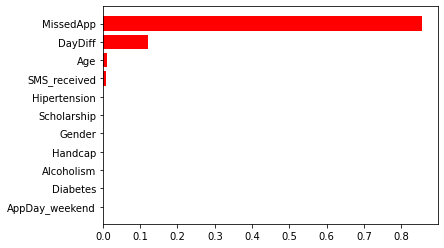

In [14]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [15]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
# save the model to compare later with the validation set
joblib.dump(value=cv.best_estimator_, filename='../../data/model/rf_model.pkl')

['../../data/model/rf_model.pkl']

Looks like only very few features really contribute to the predictions. Ideally we could remove almost 7 features and make the model much more simple

### 2. Logistic regression

In [17]:
lr = LogisticRegression()
parameters = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv_lr = GridSearchCV(estimator=lr, param_grid=parameters, cv=5)
cv_lr.fit(train_features, train_labels.values.ravel())

print_results(cv_lr)

c:\users\akhil\envs\udemy_course\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\akhil\envs\udemy_course\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

c:\users\akhil\envs\udemy_course\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\akhil\envs\udemy_course\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

BEST PARAMS: {'C': 100}

0.833 (+/-0.002) for {'C': 0.001}
0.854 (+/-0.003) for {'C': 0.01}
0.858 (+/-0.003) for {'C': 0.1}
0.859 (+/-0.002) for {'C': 1}
0.859 (+/-0.002) for {'C': 10}
0.859 (+/-0.002) for {'C': 100}
0.859 (+/-0.002) for {'C': 1000}


c:\users\akhil\envs\udemy_course\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
cv_lr.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
joblib.dump(value=cv_lr.best_estimator_, filename='../../data/model/lr_model.pkl')

['../../data/model/lr_model.pkl']

### Gradient boosting

In [20]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv_gb = GridSearchCV(gb, parameters, cv=5)
cv_gb.fit(train_features, train_labels.values.ravel())

print_results(cv_gb)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}

0.797 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.797 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.924 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.924 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.797 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.797 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.925 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.925 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.797 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.797 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.925 (+/-0.005) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.925 (+/-0.004) for {'learning_rate': 0.01,

In [21]:
joblib.dump(value=cv_gb.best_estimator_, filename='../../data/model/gb_model.pkl')

['../../data/model/gb_model.pkl']